In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

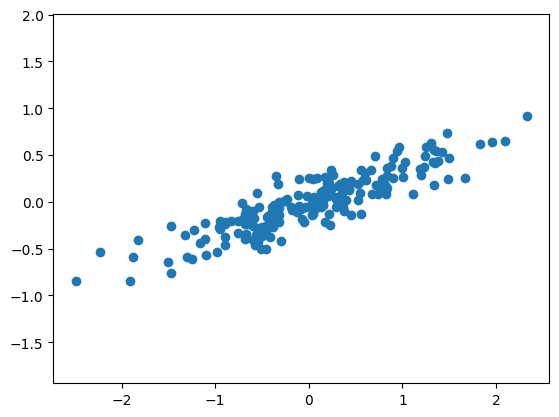

In [38]:
SEED = np.random.RandomState(1)
X = np.dot(SEED.rand(2, 2), SEED.randn(2, 200)).T
plt.axis('equal')
plt.scatter(X[:, 0], X[:, 1])

PC1 explained variance radio: 97.634%
PC2 explained variance radio: 2.366%


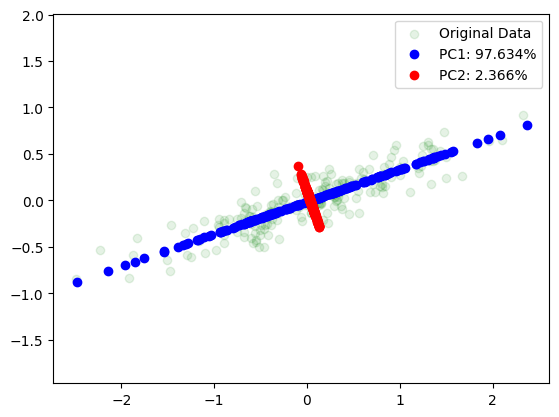

In [76]:
pca = PCA(n_components=2)
pca_X = pca.fit_transform(X)

PC1 = pca_X[:, 0].reshape(pca_X.shape[0], 1)
PC2 = pca_X[:, 1].reshape(pca_X.shape[0], 1)

zero_PC = np.zeros((pca_X.shape[0], 1))
PC1 = np.hstack([PC1, zero_PC])
PC2 = np.hstack([zero_PC, PC2])

# 將降維後的資料投影回去跟原資料做比較
# 雖然投影後一樣是 2 維的，但捨棄了其中一個維度的變異性
PC1 = pca.inverse_transform(PC1)
PC2 = pca.inverse_transform(PC2)

EVR = pca.explained_variance_ratio_
EVR1 = round(EVR[0]*100, 3)
EVR2 = round(EVR[1]*100, 3)
print(f"PC1 explained variance radio: {EVR1}%")
print(f"PC2 explained variance radio: {EVR2}%")

plt.axis('equal')
plt.scatter(X[:, 0], X[:, 1], c='g', alpha=0.1, label="Original Data")
plt.scatter(PC1[:, 0], PC1[:, 1], c='b', label=f"PC1: {EVR1}%")
plt.scatter(PC2[:, 0], PC2[:, 1], c='r', label=f"PC2: {EVR2}%")
plt.legend()
